In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wallets_with_points_2323k_sorted.csv')

print(data)
data.info()

                                             Wallet        Points
0        0x289e69e5b611f6193694f6cfa2f93b7cf161253f  7.617266e+06
1        0xd746a2a6048c5d3aff5766a8c4a0c8cfd2311745  7.524282e+06
2        0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d  4.420848e+06
3        0xe93685f3bba03016f02bd1828badd6195988d950  4.200759e+06
4        0xb8ff877ed78ba520ece21b1de7843a8a57ca47cb  3.663653e+06
...                                             ...           ...
2323281  0x8bd91741fb29f67eb13007db6642ac95e7a985dd -3.400000e-02
2323282  0xb08bfa2665552ba1582c8a4a8f6717459d06224b -9.073000e+01
2323283  0xf9062b8a30e0d7722960e305049fa50b86ba6253 -2.326070e+02
2323284  0x781e90f1c8fc4611c9b7497c3b47f99ef6969cbc -9.294397e+06
2323285  0x5300000000000000000000000000000000000005 -1.899714e+07

[2323286 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323286 entries, 0 to 2323285
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Wallet  object 
 1   

In [3]:
# Filter data to get only values with points > 1
data_filtered = data[data['Points'] > 1]

print(data_filtered)
data_filtered.info()

                                             Wallet       Points
0        0x289e69e5b611f6193694f6cfa2f93b7cf161253f  7617265.891
1        0xd746a2a6048c5d3aff5766a8c4a0c8cfd2311745  7524282.387
2        0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d  4420847.931
3        0xe93685f3bba03016f02bd1828badd6195988d950  4200759.024
4        0xb8ff877ed78ba520ece21b1de7843a8a57ca47cb  3663653.467
...                                             ...          ...
1647852  0x0ef16e3e9646060f868eedbc6331121abcbe1640        1.001
1647853  0x60ce517ad6020e06e07199b9f389e57ab53c378a        1.001
1647854  0xe63b9a64b7bd3c31ed675ff103fc5cc44113b781        1.001
1647855  0x22d13501324b7d2705cb4dd4379e35f2c39f8ecb        1.001
1647856  0xdad63e4a59be90c8316681bfab36a636d97990e4        1.001

[1647857 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1647857 entries, 0 to 1647856
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Wa

In [4]:
# Get a statistical summary of the Points
points_summary = data_filtered['Points'].describe()
total_points = data_filtered['Points'].sum()
total_wallets = data_filtered['Wallet'].count()

print('Points Summary:\n', points_summary)
print('Total Points: ', round(total_points, 0))

Points Summary:
 count    1.647857e+06
mean     2.753046e+02
std      1.321660e+04
min      1.001000e+00
25%      1.315600e+01
50%      8.753300e+01
75%      2.046220e+02
max      7.617266e+06
Name: Points, dtype: float64
Total Points:  453662693.0


## Points distribution

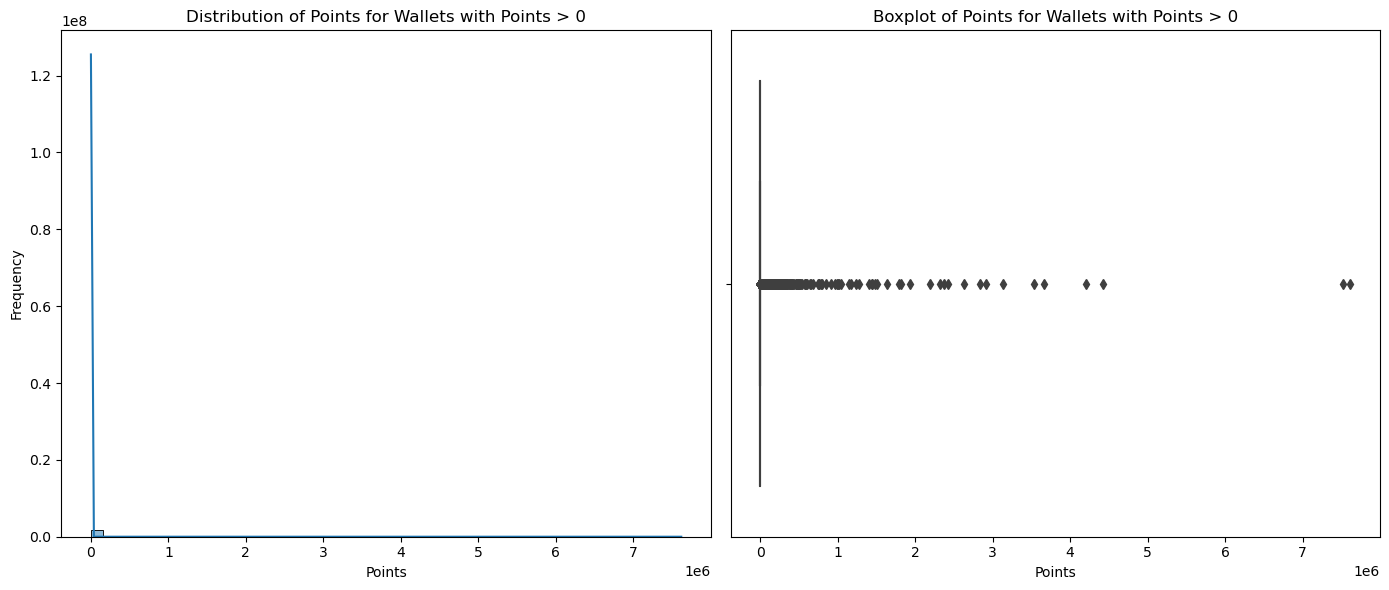

In [5]:
# Create a figure object
plt.figure(figsize=(14, 6))

# Plot 1: Histogram of points
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data_filtered['Points'], bins=50, kde=True)
plt.title('Distribution of Points for Wallets with Points > 0')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Plot 2: Boxplot of the Points
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=data_filtered['Points'])
plt.title('Boxplot of Points for Wallets with Points > 0')
plt.xlabel('Points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [6]:
# Calculate data skewness and kurtosis to get better understanding of the data
data_skewness = stats.skew(data_filtered['Points'])
data_kurtosis = stats.kurtosis(data_filtered['Points'])
print('Data skewness: ', round(data_skewness, 2))
print('Data kurtosis: ', round(data_kurtosis, 2))

Data skewness:  349.37
Data kurtosis:  160765.31


#### From our distribution plots we see that our data is highly skewed with the majority of wallets having relatively small amounts of Points, and a few having very large amounts.

## Zoom in to have a closer look to distribution

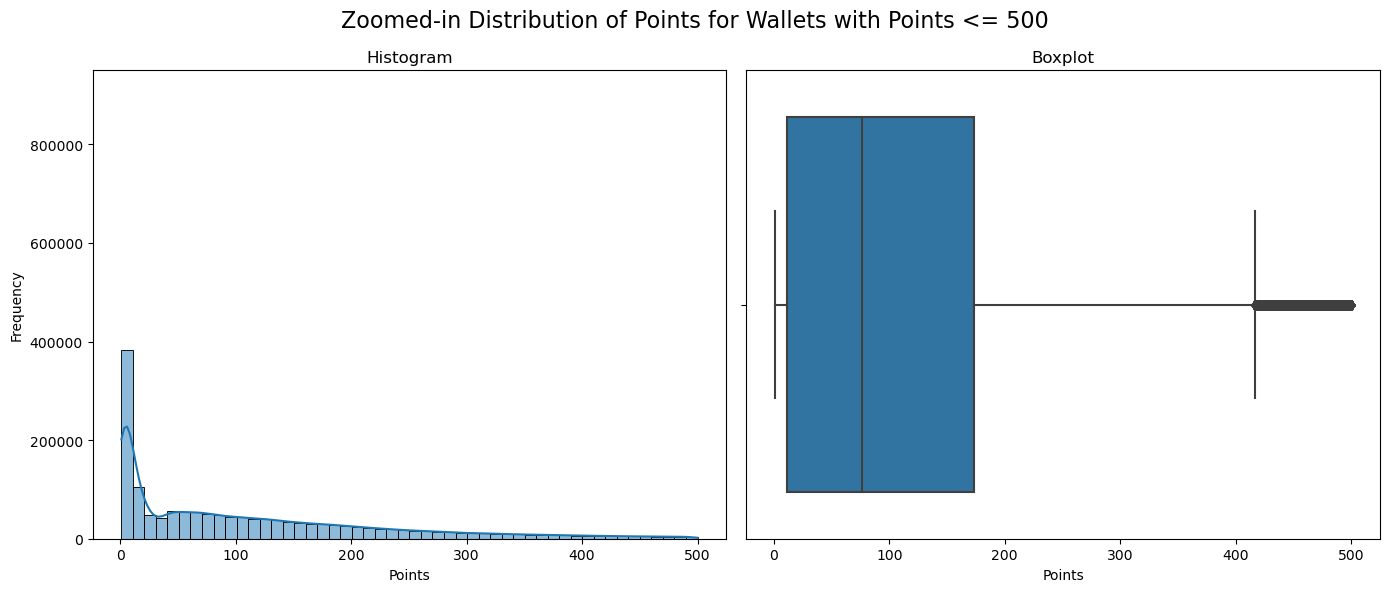

In [7]:
wallets_with_500_and_less = data_filtered[data_filtered['Points'] <= 500]['Points']

# Create a figure object
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Zoomed-in Distribution of Points for Wallets with Points <= 500', fontsize=16)

# Zoom in on the histogram for Points <= 500
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(wallets_with_500_and_less, bins=50, kde=True)
plt.title('Histogram')
plt.ylim(0, 950000)
plt.xlabel('Points')
plt.ylabel('Frequency')

# Zoom in on the boxplot for Points <= 1000
plt.subplot(1, 2, 2)
sns.boxplot(x=wallets_with_500_and_less)
plt.title('Boxplot')
plt.xlabel('Points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

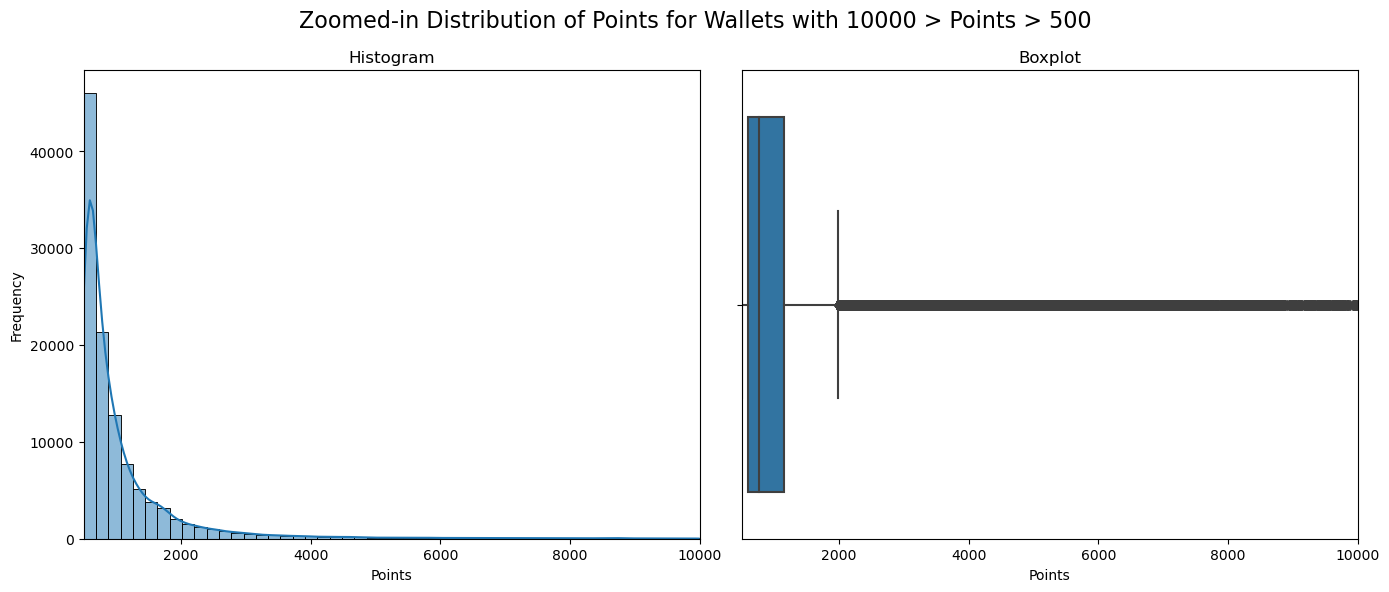

In [8]:
wallets_with_more_than_500 = data_filtered[(data_filtered['Points'] > 500) & (data_filtered['Points'] < 10000)]['Points'] 

# Create a figure object
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Zoomed-in Distribution of Points for Wallets with 10000 > Points > 500', fontsize=16)

# Zoom in on the histogram for Points > 1000
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(wallets_with_more_than_500, bins=50, kde=True)
plt.title('Histogram')
plt.xlim(500, 10000)
plt.xlabel('Points')
plt.ylabel('Frequency')

# Zoom in on the boxplot for Points > 1000
plt.subplot(1, 2, 2)
sns.boxplot(x=wallets_with_more_than_500)
plt.xlim(500, 10000)
plt.title('Boxplot')
plt.xlabel('Points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### The zoomed-in visualizations provide a clearer picture of the distribution of Points for wallets with 500 or fewer points. We can see that:

 - **Histogram:** The frequency of wallets decreases as the number of points increases. The log scale on the y-axis shows that the majority of wallets have fewer points, and there is a long tail distribution.
 - **Boxplot:** Most of the points are concentrated below 200, with a few outliers extending up to 1000.

In [9]:
# Get a statistical summary for Points <= 1000
points_summary_zoomed = data_filtered[data_filtered['Points'] <= 500]['Points'].describe()
points_sum_500less = data_filtered[data_filtered['Points'] <= 500]['Points'].sum()
points_sum_500_to_10000 = wallets_with_more_than_500.sum()
points_sum_10000more = data_filtered[data_filtered['Points'] > 10000]['Points'].sum()

wallets_points_sum_500less = data_filtered[data_filtered['Points'] <= 500]['Wallet'].count()
wallets_points_sum_500_to_10000 = wallets_with_more_than_500.count()
wallets_points_sum_10000more = data_filtered[data_filtered['Points'] > 10000]['Wallet'].count()


print(points_summary_zoomed)
print('\nSUM of points among holders with:')
print('points < 500:  ', round(points_sum_500less, 0), f' | {round((points_sum_500less/total_points)*100, 2)}% of total points', f' | {round((wallets_points_sum_500less/total_wallets)*100, 2)}% of total wallets', f' | {wallets_points_sum_500less} wallets')
print('points < 10000:', round(points_sum_500_to_10000, 0), f' | {round((points_sum_500_to_10000/total_points)*100, 2)}% of total points', f' |  {round((wallets_points_sum_500_to_10000/total_wallets)*100, 2)}% of total wallets', f' |  {wallets_points_sum_500_to_10000} wallets')
print('points > 10000:', round(points_sum_10000more, 0), f' | {round((points_sum_10000more/total_points)*100, 2)}% of total points', f' |  {round((wallets_points_sum_10000more/total_wallets)*100, 2)}% of total wallets', f' |    {wallets_points_sum_10000more} wallets')

count    1.534712e+06
mean     1.114130e+02
std      1.161162e+02
min      1.001000e+00
25%      1.102100e+01
50%      7.607300e+01
75%      1.733672e+02
max      4.999980e+02
Name: Points, dtype: float64

SUM of points among holders with:
points < 500:   170986819.0  | 37.69% of total points  | 93.13% of total wallets  | 1534712 wallets
points < 10000: 121033426.0  | 26.68% of total points  |  6.77% of total wallets  |  111634 wallets
points > 10000: 161642448.0  | 35.63% of total points  |  0.09% of total wallets  |    1511 wallets


#### We see that 5,6% wallets holds 62% of points distribution

**Analyzing Outliers** to identify and analyze wallets with points significantly higher than the mean plus three standard deviations.

In [10]:
# Define the threshold for outliers
threshold = points_summary_zoomed['mean'] + 3 * points_summary_zoomed['std'] # getting out 99.7% of normal distributed data 

# Filter out the outliers
outliers = data_filtered[data_filtered['Points'] > threshold]

# Display basic information about the outliers
print(outliers.describe())

# Display the top 10 wallets with the most points
print(outliers.nlargest(10, 'Points'))


             Points
count  1.296120e+05
mean   2.241841e+03
std    4.707970e+04
min    4.597630e+02
25%    5.470912e+02
50%    7.052400e+02
75%    1.081598e+03
max    7.617266e+06
                                       Wallet       Points
0  0x289e69e5b611f6193694f6cfa2f93b7cf161253f  7617265.891
1  0xd746a2a6048c5d3aff5766a8c4a0c8cfd2311745  7524282.387
2  0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d  4420847.931
3  0xe93685f3bba03016f02bd1828badd6195988d950  4200759.024
4  0xb8ff877ed78ba520ece21b1de7843a8a57ca47cb  3663653.467
5  0x4ef83c71eeb0db578bc74b30aa570873bfcfeae1  3535567.263
6  0x6a45232f22768441768de109f890f2dc392a5f51  3132511.639
7  0xaa1582084c4f588ef9be86f5ea1a919f86a3ee57  2915477.487
8  0x80c67432656d59144ceff962e8faf8926599bcf8  2837082.000
9  0xb6ea33fe2b633df576a47033fbccf2102119c01d  2633283.866


## T0P 0.5% of the wallets

In [11]:
# Calculate the number of top wallets
top_0_5_percent_count = int(len(data_filtered) * 0.005)

# Get the top 1% of wallets
top_wallets = data_filtered.nlargest(top_0_5_percent_count, 'Points')

# Calculate total points of top 1%
top_0_5_percent_sum = top_wallets['Points'].sum()

# Display basic information about the top wallets
print(top_wallets.describe())
print('Points SUM: ', round(top_0_5_percent_sum, 0))

# Display the top and last 10 wallets with the most points
print(top_wallets.head(10))
print(top_wallets.tail(10))

             Points
count  8.239000e+03
mean   2.301005e+04
std    1.854986e+05
min    2.431863e+03
25%    2.911883e+03
50%    3.925599e+03
75%    7.528403e+03
max    7.617266e+06
Points SUM:  189579809.0
                                       Wallet       Points
0  0x289e69e5b611f6193694f6cfa2f93b7cf161253f  7617265.891
1  0xd746a2a6048c5d3aff5766a8c4a0c8cfd2311745  7524282.387
2  0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d  4420847.931
3  0xe93685f3bba03016f02bd1828badd6195988d950  4200759.024
4  0xb8ff877ed78ba520ece21b1de7843a8a57ca47cb  3663653.467
5  0x4ef83c71eeb0db578bc74b30aa570873bfcfeae1  3535567.263
6  0x6a45232f22768441768de109f890f2dc392a5f51  3132511.639
7  0xaa1582084c4f588ef9be86f5ea1a919f86a3ee57  2915477.487
8  0x80c67432656d59144ceff962e8faf8926599bcf8  2837082.000
9  0xb6ea33fe2b633df576a47033fbccf2102119c01d  2633283.866
                                          Wallet    Points
8229  0xf5b850c1a0f77490df80a17e80d16b49a5aeae4f  2434.406
8230  0x2987142bbcc00395272f

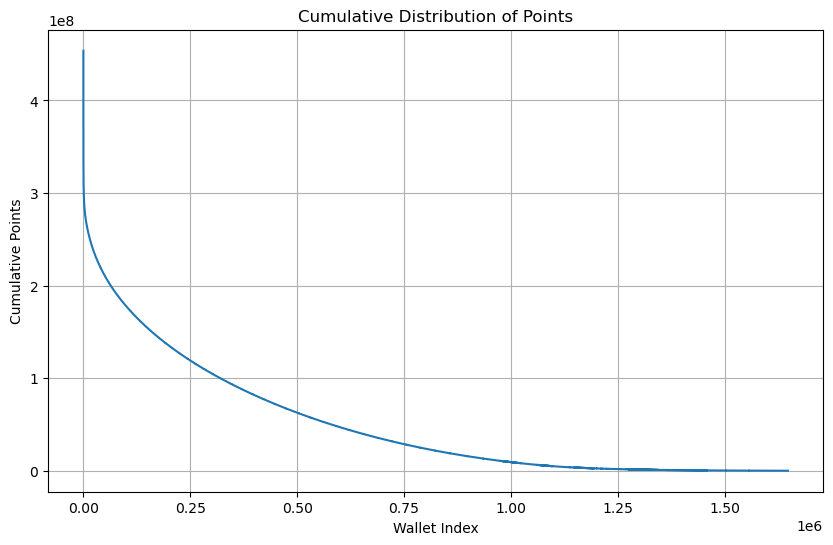

In [12]:
# Sort the filtered data by Points
sorted_points = data_filtered['Points'].sort_values()

# Calculate cumulative sum of points
cumulative_points = sorted_points.cumsum()

# Plot the cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(sorted_points.index, cumulative_points)
plt.grid()
plt.title('Cumulative Distribution of Points')
plt.xlabel('Wallet Index')
plt.ylabel('Cumulative Points')
plt.show()

The chart indicates:
 - only a few wallets hold around half of all points
 - the last 1 million of wallets holds almost nothing